In [4]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import numpy as np
from collections import defaultdict
from scipy import stats

cid ="baca9371d5f8409a85ffee343639df22" 
secret = "75d20d82245b445882cafae68e3442aa"

client_credentials_manager = SpotifyClientCredentials(client_id=cid,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
name = "{The Internet}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6MPCFvOQv5cIGfw3jODMF0'},
  'href': 'https://api.spotify.com/v1/artists/6MPCFvOQv5cIGfw3jODMF0',
  'id': '6MPCFvOQv5cIGfw3jODMF0',
  'name': 'Internet Money',
  'type': 'artist',
  'uri': 'spotify:artist:6MPCFvOQv5cIGfw3jODMF0'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/4Ga1P7PMIsmqEZqhYZQgDo'},
  'href': 'https://api.spotify.com/v1/artists/4Ga1P7PMIsmqEZqhYZQgDo',
  'id': '4Ga1P7PMIsmqEZqhYZQgDo',
  'name': 'Lil Tecca',
  'type': 'artist',
  'uri': 'spotify:artist:4Ga1P7PMIsmqEZqhYZQgDo'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/31W5EY0aAly4Qieq6OFu6I'},
  'href': 'https://api.spotify.com/v1/artists/31W5EY0aAly4Qieq6OFu6I',
  'id': '31W5EY0aAly4Qieq6OFu6I',
  'name': 'A Boogie Wit da Hoodie',
  'type': 'artist',
  'uri': 'spotify:artist:31W5EY0aAly4Qieq6OFu6I'}]

In [5]:
#Extract Artist's uri
artist_uri = "7GN9PivdemQRKjDt4z5Zv8"
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:27ThgFMUAx3MXLQ297DzWF',
 'spotify:album:5M9CjIKPBWzDxGqPJ4RQ7J',
 'spotify:album:6VRHTAqFOO5qqznRZ5cUys',
 'spotify:album:69g3CtOVg98TPOwqmI2K7Q',
 'spotify:album:4Bpt4fHYxxgqR2GjrxyR6D',
 'spotify:album:1ZTnvAXIujEZZ8kzfJirxp']

In [6]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [7]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Hive Mind songs has been added to spotify_albums dictionary
Album The Internet - Japan Hits Collection songs has been added to spotify_albums dictionary
Album Ego Death songs has been added to spotify_albums dictionary
Album Ego Death songs has been added to spotify_albums dictionary
Album Feel Good songs has been added to spotify_albums dictionary
Album Purple Naked Ladies songs has been added to spotify_albums dictionary


In [8]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [9]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 19.472649097442627 seconds


In [10]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

78

In [11]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
pd.unique(df['album'])

array(['Hive Mind', 'The Internet - Japan Hits Collection', 'Ego Death',
       'Feel Good', 'Purple Naked Ladies'], dtype=object)

In [32]:
#df.iloc[:13,]
#df.iloc[25:39,]
#df.iloc[51:64,]
#df.iloc[64:,]

df_a = df[['album','name','valence','popularity']]

subset = list(range(0,13))
subset.extend(list(range(25,39)))
subset.extend(list(range(51,78)))

final_df = df_a.iloc[subset,:]

final_df

,album,name,valence,popularity
0,Hive Mind,Come Together,0.520,55
1,Hive Mind,Roll (Burbank Funk),0.967,57
2,Hive Mind,Come Over,0.691,63
3,Hive Mind,La Di Da,0.834,54
4,Hive Mind,Stay the Night,0.604,52
5,Hive Mind,Bravo,0.832,44
6,Hive Mind,Mood,0.483,47
7,Hive Mind,Next Time / Humble Pie,0.840,47
8,Hive Mind,It Gets Better (With Time),0.514,52
9,Hive Mind,Look What U Started,0.530,49


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure

Text(0, 0.5, 'Valence Score')

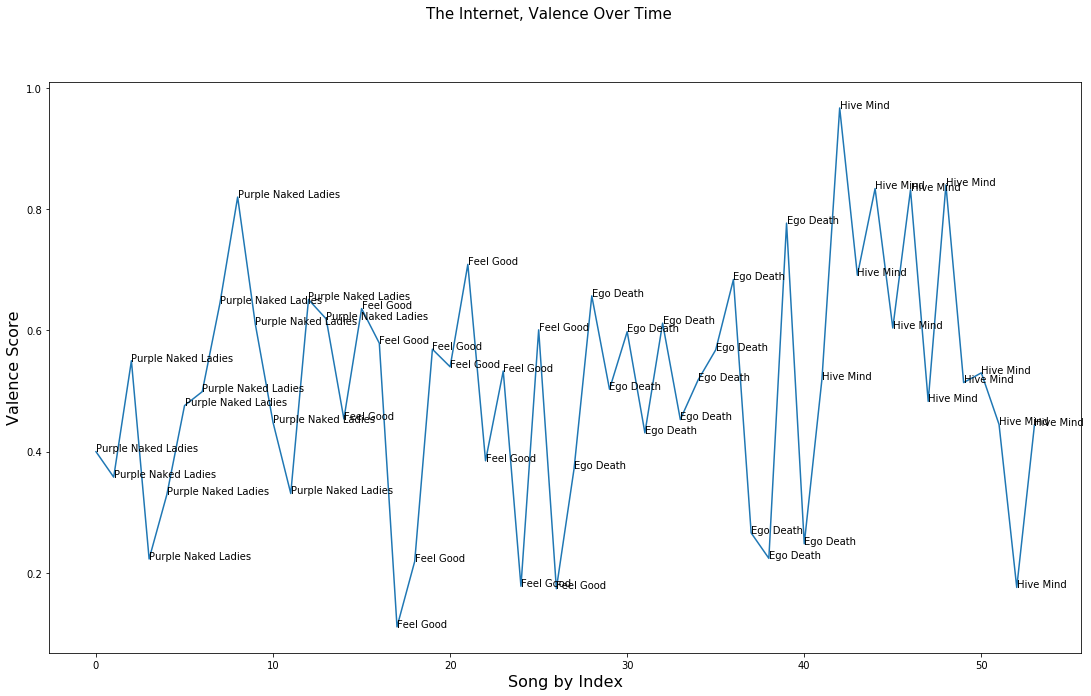

In [36]:
albums = list(pd.unique(final_df["album"]))
albums.reverse()

alb_n = []
v_scores = []

for x in albums:
    for track in final_df[final_df["album"]==x].iterrows():
        
        alb_n.append(track[1]['album'])
        v_scores.append(track[1]['valence'])

fig, ax = pyplot.subplots()
ax.plot(v_scores)

for i in range(len(v_scores)):
    ax.annotate(alb_n[i],(i,v_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.suptitle('The Internet, Valence Over Time', fontsize=15)
pyplot.xlabel('Song by Index', fontsize=16)
pyplot.ylabel('Valence Score', fontsize=16)

Text(0, 0.5, 'Valence Scores')

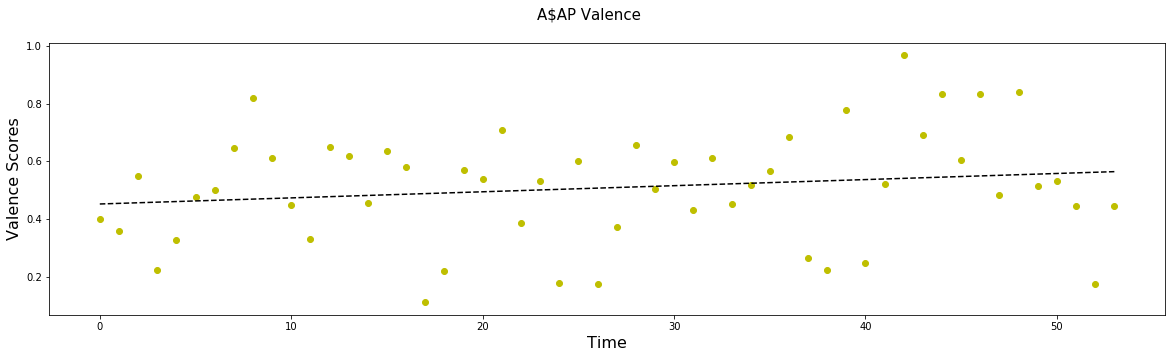

In [35]:
x = range(0,len(v_scores))

pyplot.figure(figsize=(20, 5))

coef = np.polyfit(x,v_scores,deg=1)
poly1d_fn = np.poly1d(coef) 

pyplot.plot(x,v_scores, 'yo', x, poly1d_fn(x), '--k')

fig = pyplot.gcf()

fig.suptitle('The Internet Valence', fontsize=15)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Valence Scores', fontsize=16)

In [123]:
stat_lst = []
stat_lst = [slope, intercept, r_value, p_value, std_err] = stats.linregress(x, v_scores)
r_sq = stat_lst[2]**2
print(r_sq)

stat_lst

0.07214701260238678


LinregressResult(slope=-0.0034847434474515517, intercept=0.45815711175616847, rvalue=-0.26860195941650683, pvalue=0.05418208388165936, stderr=0.0017673241690453906)

In [41]:
final_df[['album','name','valence',]].groupby(df['album'],sort=False).describe().iloc[::-1]

valence                                              \
                      count      mean       std    min      25%     50%   
album                                                                     
Purple Naked Ladies    14.0  0.497071  0.162396  0.223  0.36850  0.4875   
Feel Good              13.0  0.437538  0.202265  0.111  0.21900  0.5330   
Ego Death              14.0  0.493643  0.170872  0.224  0.38675  0.5105   
Hive Mind              13.0  0.606154  0.217791  0.176  0.48300  0.5300   

                                     
                         75%    max  
album                                
Purple Naked Ladies  0.61675  0.820  
Feel Good            0.57900  0.709  
Ego Death            0.60850  0.777  
Hive Mind            0.83200  0.967